In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [162]:
tf1 = pd.read_csv('../TestResults/RandomBaseline01.csv')
tf2 = pd.read_csv('../TestResults/RandomBaseline02.csv')
tf3 = pd.read_csv('../TestResults/RandomBaseline03.csv')

In [163]:
tf1

,Algorithm,Baseline,originalTitle,originalCategory,Language_50,Reference_50,Religion_50,Science_50,Arts_50,Entertainment_50,...,Sports_50,Politics_50,Geography_50,Humanities_50,World_50,Education_50,Philosophy_50,Law_50,Events_50,Health_50
0,bloomfilter,RandomBaseline_test,Angelic tongues,Language_50,0.400000,0.200000,0.220000,0.280000,0.240000,0.340000,...,0.160000,0.300000,0.260000,0.200000,0.220000,0.220000,0.240000,0.120000,0.160000,0.240000
1,bloomfilter,RandomBaseline_test,Arendalsk,Language_50,0.040000,0.060000,0.080000,0.060000,0.020000,0.040000,...,0.020000,0.040000,0.060000,0.060000,0.060000,0.060000,0.040000,0.020000,0.000000,0.060000
2,bloomfilter,RandomBaseline_test,Authors' conference,Language_50,0.380000,0.280000,0.320000,0.300000,0.320000,0.380000,...,0.320000,0.280000,0.500000,0.300000,0.320000,0.320000,0.240000,0.240000,0.360000,0.320000
3,bloomfilter,RandomBaseline_test,Baenan language,Language_50,0.060000,0.000000,0.080000,0.060000,0.020000,0.040000,...,0.040000,0.040000,0.060000,0.080000,0.100000,0.060000,0.060000,0.020000,0.020000,0.040000
4,bloomfilter,RandomBaseline_test,Bahasa,Language_50,0.140000,0.080000,0.140000,0.100000,0.060000,0.100000,...,0.080000,0.100000,0.100000,0.120000,0.100000,0.100000,0.120000,0.060000,0.040000,0.100000
5,bloomfilter,RandomBaseline_test,Bangladeshi English,Language_50,0.420000,0.260000,0.320000,0.460000,0.440000,0.500000,...,0.420000,0.460000,0.460000,0.320000,0.460000,0.500000,0.380000,0.340000,0.480000,0.380000
6,bloomfilter,RandomBaseline_test,Coaxial power connector,Language_50,0.280000,0.340000,0.340000,0.240000,0.380000,0.320000,...,0.260000,0.300000,0.260000,0.120000,0.320000,0.260000,0.260000,0.200000,0.220000,0.260000
7,bloomfilter,RandomBaseline_test,Communication theory,Language_50,0.580000,0.560000,0.600000,0.540000,0.420000,0.500000,...,0.440000,0.400000,0.520000,0.500000,0.460000,0.520000,0.560000,0.280000,0.300000,0.500000
8,bloomfilter,RandomBaseline_test,Community interpreting,Language_50,0.120000,0.140000,0.160000,0.160000,0.180000,0.120000,...,0.140000,0.180000,0.220000,0.160000,0.160000,0.200000,0.100000,0.120000,0.180000,0.180000
9,bloomfilter,RandomBaseline_test,Complex text layout,Language_50,0.380000,0.300000,0.300000,0.320000,0.360000,0.380000,...,0.280000,0.320000,0.400000,0.260000,0.440000,0.300000,0.440000,0.220000,0.280000,0.420000


In [187]:
def renameCat(res):
    res={key.split('_')[0]:val for key,val in res.items()}
    return res

In [188]:
#False Positive testing
#bloomfilter
def calcHitpercentage(algo,tf):
    bloom1 = tf.loc[tf['Algorithm']==algo]
    categories=list(bloom1)[4:]
    bloom1_cate=bloom1[categories]
    bloom1['Max'] = bloom1_cate.idxmax(axis=1)
    bloom1_res={}
    for index,rows in bloom1[['originalCategory','Max']].iterrows():
        if rows['originalCategory'] not in bloom1_res:
            bloom1_res[rows['originalCategory']]=0
        if rows['originalCategory']== rows['Max']:
            bloom1_res[rows['originalCategory']]+=1

    bloom1_res2={key: (val/len(bloom1.loc[bloom1['originalCategory']==key])) for key, val in bloom1_res.items()}
    return bloom1_res2
bf_res01=renameCat(calcHitpercentage('bloomfilter',tf1))
lsi_res01=renameCat(calcHitpercentage('LSI',tf1))
bf_res02=renameCat(calcHitpercentage('bloomfilter',tf2))
#bf_res03=calcHitpercentage('bloomfilter',tf3)
#lsi_res03=calcHitpercentage('LSI',tf3)


/Users/Eike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [189]:
def calcRangeHit(algo,tf):
    a = tf.loc[tf['Algorithm']==algo]
    categories=list(a)[4:]
    a_cate=a[categories]
    a['Max'] = a_cate.idxmax(axis=1)
    a_res={}
    for index,rows in a.iterrows():
        max_val=rows[rows['Max']]
        th_val=max_val*0.8
        test = [col for col,val in rows[categories].iteritems() if val>=th_val]
        #print(rows['originalCategory'],test)
        if rows['originalCategory'] not in a_res:
            a_res[rows['originalCategory']]=0
        if rows['originalCategory'] in test:
            a_res[rows['originalCategory']]+=1
    return {key: (val/len(a.loc[a['originalCategory']==key])) for key, val in a_res.items()}

In [193]:
bf_Rh_res01 = renameCat(calcRangeHit('bloomfilter',tf1))
bf_Rh_res02 = renameCat(calcRangeHit('bloomfilter',tf2))
LSI_Rh_res01 = renameCat(calcRangeHit('LSI',tf1))

/Users/Eike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


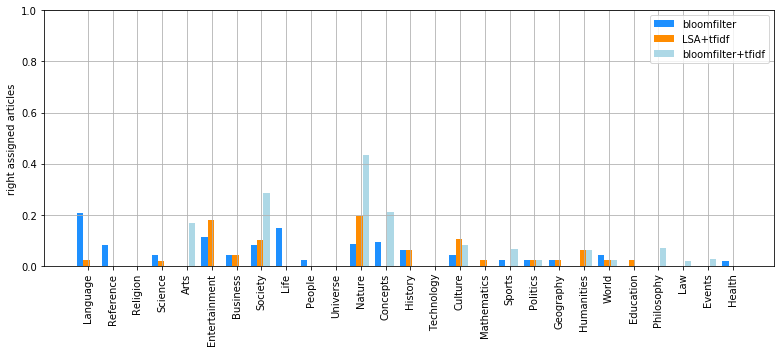

In [203]:
ind = np.arange(len(bf_res01))    # the x locations for the groups
width = 0.25        # the width of the bars

fig, ax = plt.subplots(figsize=(11,5))



p1 = ax.bar(ind-width,list(bf_res01.values()),width, align='center',color='dodgerblue')
p2 = ax.bar(ind,list(lsi_res01.values()),width, align='center',color='darkorange')
p3 = ax.bar(ind+width,list(bf_res02.values()),width, align='center',color='lightblue')



ax.set_xticks(ind + width / 5)
ax.set_xticklabels(list(bf_res01.keys()),rotation='vertical')
ax.legend((p1[0], p2[0], p3[0]), ('bloomfilter', 'LSA+tfidf','bloomfilter+tfidf'))
ax.set_ylim([0,1])
ax.set_ylabel('right assigned articles')
ax.grid()
plt.tight_layout()
plt.savefig('../TestResults/accurance.png',dpi=500)
plt.show()

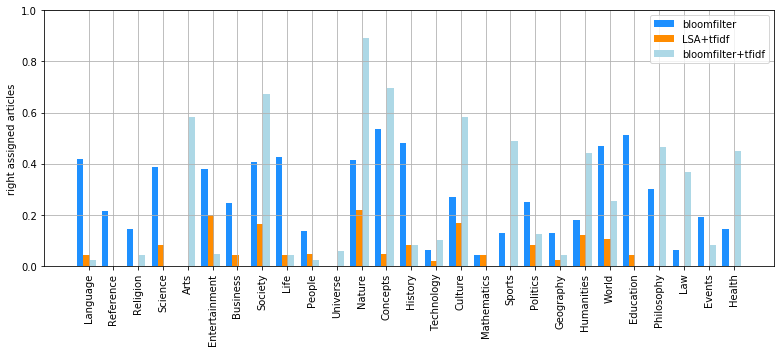

In [204]:
ind = np.arange(len(bf_res01))    # the x locations for the groups
width = 0.25         # the width of the bars

fig, ax = plt.subplots(figsize=(11,5))



p1 = ax.bar(ind-width,list(bf_Rh_res01.values()),width, align='center',color='dodgerblue')
p2 = ax.bar(ind,list(LSI_Rh_res01.values()),width, align='center',color='darkorange')
p3 = ax.bar(ind+width,list(bf_Rh_res02.values()),width, align='center',color='lightblue')

ax.set_xticks(ind + width / 3)
ax.set_xticklabels(list(bf_Rh_res02.keys()),rotation='vertical')
ax.legend((p1[0], p2[0], p3[0]), ('bloomfilter', 'LSA+tfidf','bloomfilter+tfidf'))
ax.set_ylim([0,1])
ax.set_ylabel('right assigned articles')
ax.grid()
plt.tight_layout()
plt.savefig('../TestResults/rangeAccurance.png',dpi=500)

plt.show()

In [ ]:
nlargest = 3
order = np.argsort(-df.values, axis=1)[:, :nlargest]
result = pd.DataFrame(df.columns[order], 
                      columns=['top{}'.format(i) for i in range(1, nlargest+1)],
                      index=df.index)


In [113]:
bloom2 = tf2.loc[tf2['Algorithm']=='bloomfilter']
categories=list(bloom2)[4:]
bloom2_cate=bloom2[categories]
bloom2['Max'] = bloom2_cate.idxmax(axis=1)
bloom2



/Users/Eike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Algorithm,Baseline,originalTitle,originalCategory,Language_50,Reference_50,Religion_50,Science_50,Arts_50,Entertainment_50,...,Politics_50,Geography_50,Humanities_50,World_50,Education_50,Philosophy_50,Law_50,Events_50,Health_50,Max
0,bloomfilter,RandomBaseline02,Angelic tongues,Language_50,0.34,0.02,0.20,0.30,0.36,0.16,...,0.14,0.18,0.38,0.26,0.08,0.30,0.22,0.08,0.32,Concepts_50
1,bloomfilter,RandomBaseline02,Arendalsk,Language_50,0.02,0.06,0.06,0.02,0.04,0.02,...,0.04,0.02,0.06,0.06,0.00,0.08,0.06,0.02,0.08,Concepts_50
2,bloomfilter,RandomBaseline02,Authors' conference,Language_50,0.22,0.10,0.36,0.32,0.54,0.16,...,0.26,0.40,0.40,0.38,0.22,0.42,0.42,0.28,0.48,Concepts_50
3,bloomfilter,RandomBaseline02,Baenan language,Language_50,0.02,0.00,0.02,0.00,0.02,0.00,...,0.04,0.00,0.08,0.10,0.04,0.06,0.04,0.04,0.06,World_50
4,bloomfilter,RandomBaseline02,Bahasa,Language_50,0.12,0.04,0.14,0.02,0.10,0.04,...,0.08,0.06,0.14,0.10,0.04,0.12,0.08,0.10,0.14,Concepts_50
5,bloomfilter,RandomBaseline02,Bangladeshi English,Language_50,0.24,0.04,0.26,0.32,0.54,0.24,...,0.38,0.32,0.44,0.50,0.28,0.46,0.50,0.36,0.50,Universe_50
6,bloomfilter,RandomBaseline02,Coaxial power connector,Language_50,0.20,0.18,0.42,0.18,0.52,0.12,...,0.20,0.22,0.20,0.36,0.14,0.42,0.36,0.16,0.36,Arts_50
7,bloomfilter,RandomBaseline02,Communication theory,Language_50,0.22,0.18,0.50,0.18,0.62,0.12,...,0.26,0.24,0.58,0.38,0.12,0.74,0.44,0.16,0.64,Philosophy_50
8,bloomfilter,RandomBaseline02,Community interpreting,Language_50,0.06,0.02,0.10,0.06,0.20,0.00,...,0.10,0.12,0.20,0.20,0.08,0.14,0.16,0.10,0.22,Concepts_50
9,bloomfilter,RandomBaseline02,Complex text layout,Language_50,0.28,0.12,0.38,0.28,0.54,0.16,...,0.18,0.30,0.34,0.38,0.08,0.52,0.36,0.14,0.52,Society_50


In [128]:
bloom2_res={}
for index,rows in bloom2.iterrows():
    max_val=rows[rows['Max']]
    th_val=max_val*0.9
    test = [col for col,val in rows[categories].iteritems() if val>=th_val]
    if rows['originalCategory'] not in bloom2_res:
        bloom2_res[rows['originalCategory']]=0
    if rows['originalCategory'] in test:
        bloom2_res[rows['originalCategory']]+=1
    #bloom1['Max'] = bloom1_cate.idxmax(axis=1)
bloom2_res

{'Language_50': 0,
 'Reference_50': 0,
 'Religion_50': 0,
 'Science_50': 0,
 'Arts_50': 11,
 'Entertainment_50': 1,
 'Business_50': 0,
 'Society_50': 21,
 'Life_50': 2,
 'People_50': 1,
 'Universe_50': 1,
 'Nature_50': 30,
 'Concepts_50': 19,
 'History_50': 3,
 'Technology_50': 2,
 'Culture_50': 11,
 'Mathematics_50': 0,
 'Sports_50': 13,
 'Politics_50': 2,
 'Geography_50': 2,
 'Humanities_50': 12,
 'World_50': 6,
 'Education_50': 0,
 'Philosophy_50': 9,
 'Law_50': 10,
 'Events_50': 3,
 'Health_50': 6}

In [91]:
bloom1['Max'] = bloom1_cate.idxmax(axis=1)

bloom1_res={}
for index,rows in bloom1[['originalCategory','Max']].iterrows():
    if rows['originalCategory'] not in bloom1_res:
        bloom1_res[rows['originalCategory']]=0
    if rows['originalCategory']== rows['Max']:
        bloom1_res[rows['originalCategory']]+=1

bloom1_res2={key: (val/len(bloom1.loc[bloom1['originalCategory']==key])) for key, val in bloom1_res.items()}




,Language_50,Reference_50,Religion_50,Science_50,Arts_50,Entertainment_50,Business_50,Society_50,Life_50,People_50,...,Politics_50,Geography_50,Humanities_50,World_50,Education_50,Philosophy_50,Law_50,Events_50,Health_50,Max
0,0.40,0.20,0.22,0.28,0.24,0.34,0.32,0.24,0.24,0.26,...,0.30,0.26,0.20,0.22,0.22,0.24,0.12,0.16,0.24,Language_50
1,0.04,0.06,0.08,0.06,0.02,0.04,0.04,0.08,0.04,0.06,...,0.04,0.06,0.06,0.06,0.06,0.04,0.02,0.00,0.06,Concepts_50
2,0.38,0.28,0.32,0.30,0.32,0.38,0.34,0.38,0.56,0.34,...,0.28,0.50,0.30,0.32,0.32,0.24,0.24,0.36,0.32,Life_50
3,0.06,0.00,0.08,0.06,0.02,0.04,0.06,0.06,0.06,0.06,...,0.04,0.06,0.08,0.10,0.06,0.06,0.02,0.02,0.04,World_50
4,0.14,0.08,0.14,0.10,0.06,0.10,0.14,0.12,0.10,0.10,...,0.10,0.10,0.12,0.10,0.10,0.12,0.06,0.04,0.10,Concepts_50
5,0.42,0.26,0.32,0.46,0.44,0.50,0.46,0.40,0.52,0.36,...,0.46,0.46,0.32,0.46,0.50,0.38,0.34,0.48,0.38,Mathematics_50
6,0.28,0.34,0.34,0.24,0.38,0.32,0.32,0.30,0.34,0.30,...,0.30,0.26,0.12,0.32,0.26,0.26,0.20,0.22,0.26,Arts_50
7,0.58,0.56,0.60,0.54,0.42,0.50,0.36,0.58,0.60,0.46,...,0.40,0.52,0.50,0.46,0.52,0.56,0.28,0.30,0.50,Religion_50
8,0.12,0.14,0.16,0.16,0.18,0.12,0.18,0.16,0.18,0.18,...,0.18,0.22,0.16,0.16,0.20,0.10,0.12,0.18,0.18,Concepts_50
9,0.38,0.30,0.30,0.32,0.36,0.38,0.28,0.40,0.44,0.40,...,0.32,0.40,0.26,0.44,0.30,0.44,0.22,0.28,0.42,Concepts_50
